# PYTHON IMPLEMENTATION

Problem Statement:



                            Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/ankus/Downloads/Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.shape

(200, 5)

In [4]:
#checking null values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

there is no null values in the dataset

In [5]:
#data description
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#dropping unwanted column
data=data.drop(columns=['Unnamed: 0'])
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


let's visualize the data and analize the relationship between independent and dependent variable

# checking the correlation

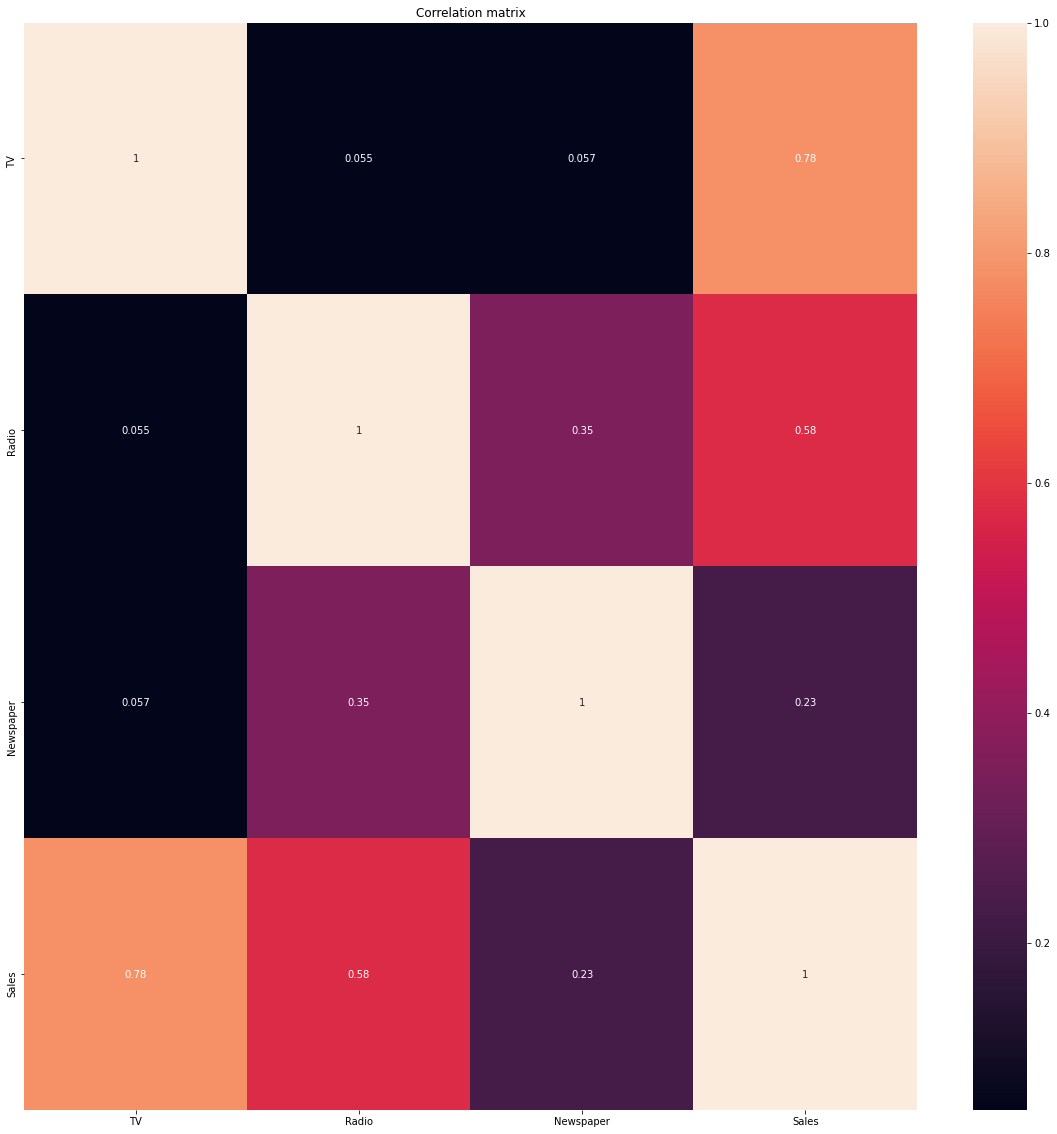

In [7]:
#let's visualize the relationship
data.corr()

corr_mat=data.corr()
#size of the canvas
plt.figure(figsize=[20,20])
#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

In [8]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [9]:
corr_mat=data.corr()
corr_mat["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

now we can clearly identify the correlation of independent variable with target variable

In [10]:
#spliting the dataset into target and independent variable
x=data.drop("Sales",axis=1)
y=data["Sales"]

In [11]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

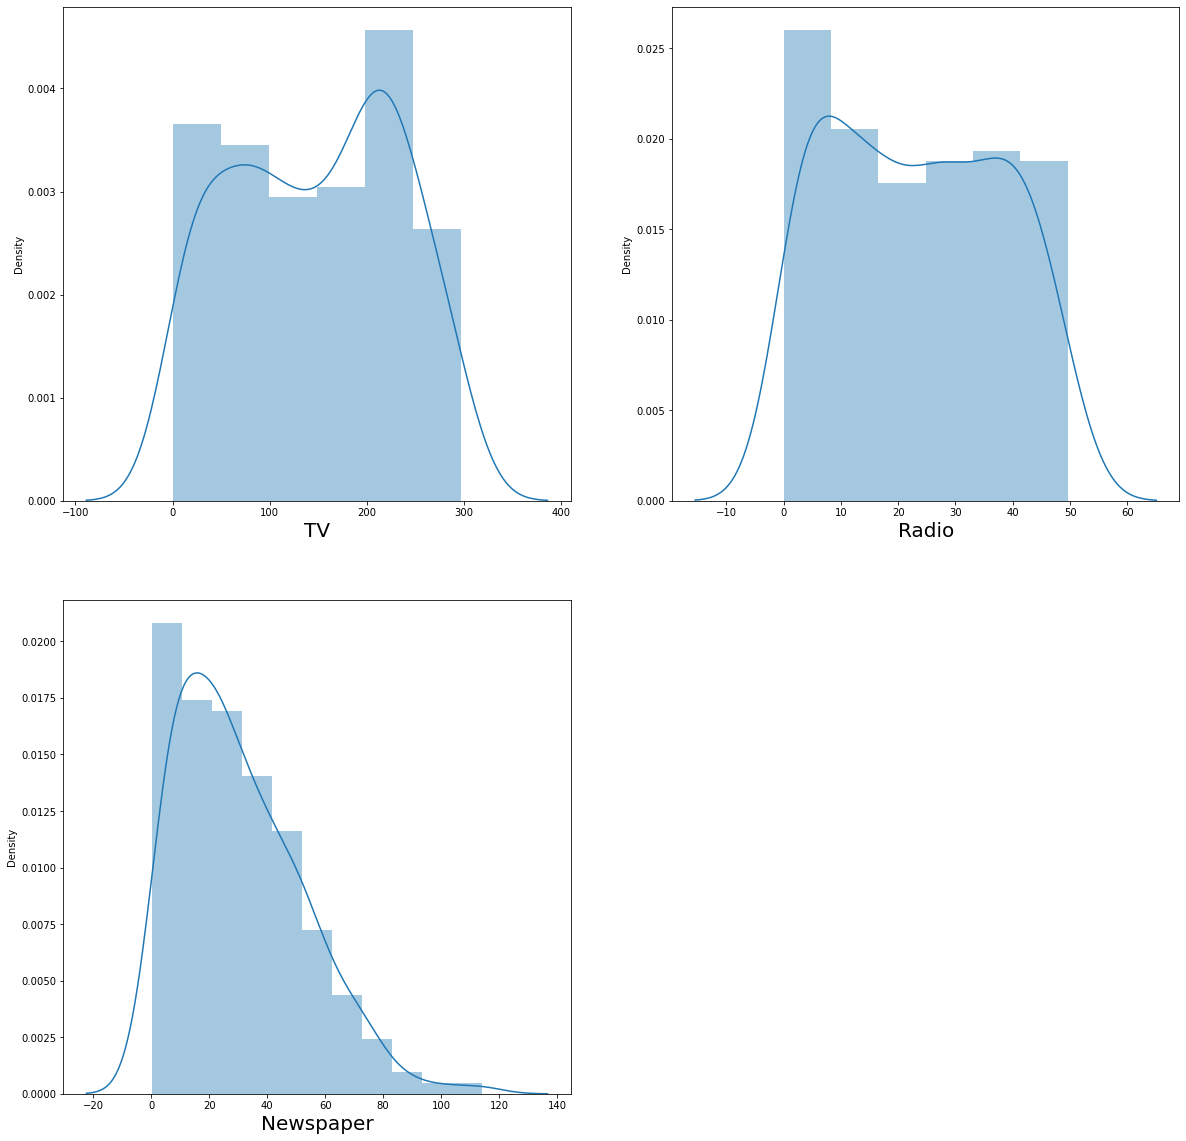

In [13]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
#checking for skewness
x.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
dtype: float64

there is little skewness in the newspaper column as the values is grater than 0.5 . so we will remove the skewness using power_transform

In [15]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [16]:
x

,TV,Radio,Newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [17]:
#validating that skewness is removed or not
x.skew().sort_values()

TV          -0.315199
Radio       -0.242968
Newspaper   -0.077942
dtype: float64

now the values are between -0.5 to 0.5 so we can assume that the skewness has been removed

# Outliers check

In [18]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

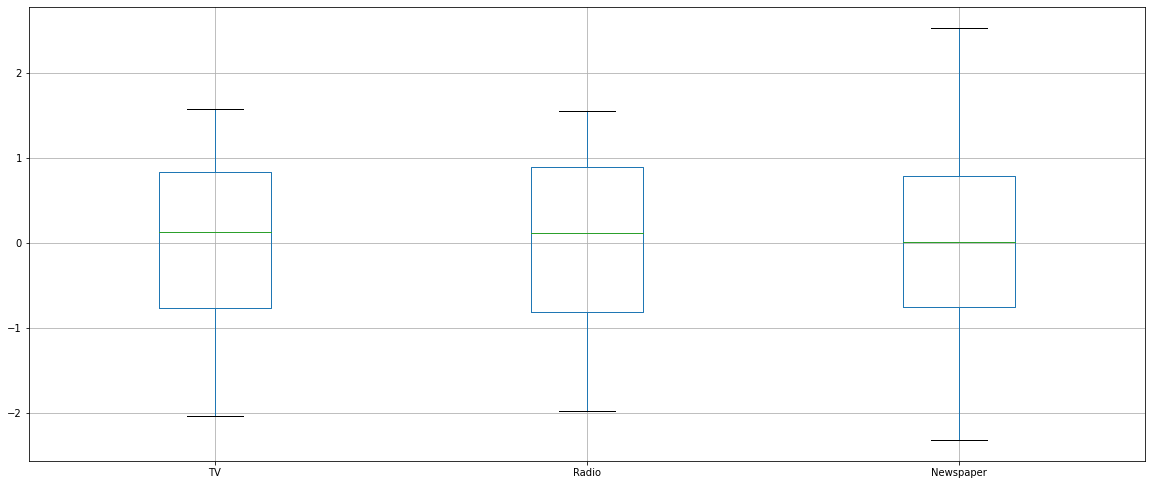

In [19]:
#plotting boxplot for outliers
x.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

we can clearly see that there is no outliers. so proceed further for training process

# Data Scaling

In [20]:
#data scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [21]:
x_scaled=scaler.fit_transform(x)

In [22]:
x_scaled

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

let's go ahead and use linear regression and see how good it fits our data but the first lets split the data in train and test

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [24]:
#finding  best random state
maxAccu=0     #maximum accuracy
maxRS=0       #best random state value for which max accuracy is achieved

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is :",maxAccu,"on Random_state",maxRS)

Best Accuracy is : 0.9379030875501375 on Random_state 13


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=13)

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
#Ajusted r2 score
lr.score(x_train,y_train)

0.8938321843548829

In [ ]:
let's check how well it fits the test data

In [30]:
lr.score(x_test,y_test)

0.9379030875501375

# Cross validation of the model

In [48]:
train_accuracy=lr.score(x_train,y_train)
test_accuracy=lr.score(x_test,y_test)
from sklearn.model_selection import cross_val_score,GridSearchCV
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
    

0.8978060430607069

here we have handled the problem of overfitting and underfitting by checking the training and testing score

# let's plot and visualize

In [49]:
y_pred=lr.predict(x_test)

In [50]:
y_pred

array([12.90779703,  4.28063668, 16.92164092, 13.17413317, 12.46214784,
       23.0587721 , 21.16021746, 15.02186229, 21.40707158, 15.91324337,
       16.78893768,  5.95742909,  8.09903879, 18.8063163 , 17.47713261,
       16.64097986,  7.54262808, 10.16042023, 20.1081074 , 18.10392262,
       12.30794444,  8.33582441, 21.36510272, 12.80292041, 17.66805978,
       19.62831641,  9.71551517, 14.06284592, 22.77407934,  7.72264534,
       15.7388947 , 18.65600403, 17.76535338,  7.16133996, 16.92481471,
        9.19294393, 10.20265394, 20.37848925,  4.89232309, 11.12670108,
        9.71912437, 19.06568093, 20.68978224,  1.88813811, 15.01093451,
       20.84289597, 19.3214108 , 10.81854436, 10.13427405, 21.06945748])

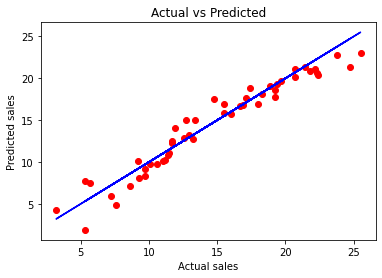

In [51]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Actual vs Predicted")
plt.show()

best fit line covering most of the datapoints which shows good fit of our model

# Regukarization

In [55]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [66]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

81.31199190043267

In [67]:
lss=r2_score(y_test,pred_ls)
lss*100

84.34795491171595

In [68]:
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100
    

89.78060430607069

# Ensemble Technique

In [70]:
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [71]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2_score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross_val_score :',rfc*100)

R2_score : 97.59624438965768
Cross_val_score : 97.46493707444174


# we are getting model accuracy and cross validation both as 97% which shows that model is performing well

In [72]:
import pickle
filename='ADVERTISEMENT SALES CHANNEL PREDICTION.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [74]:
loaded_model=pickle.load(open('ADVERTISEMENT SALES CHANNEL PREDICTION.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

97.59624438965768


In [75]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orignal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Predicted,12.97,4.672,15.485,13.001,11.929,24.615,19.814,12.601,23.115,15.188,...,10.001,19.18,22.18,5.813,11.704,22.812,19.172,11.919,8.501,21.115
Orignal,12.97,4.672,15.485,13.001,11.929,24.615,19.814,12.601,23.115,15.188,...,10.001,19.18,22.18,5.813,11.704,22.812,19.172,11.919,8.501,21.115
